In [0]:
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import albumentations as A
import numpy as np
import math  
from matplotlib import pyplot as plt
import torch
import cv2
%matplotlib inline

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path

    self.rgb_image = None
    self.bgr_image = None
    self.gray_image = None


  def read_image(self, return_image = False):
    self.rgb_image = plt.imread(self.path)
    if return_image:
      return self.rgb_image


  def bgr(self, return_image = False):
    self.bgr_image = np.flip(plt.imread(self.path), 2)
    if return_image:
      return self.bgr_image


  def gray(self, return_image = False):
    self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
    if return_image:
      return self.gray_imagezoom_img


  @staticmethod
  def show(image, title = 'image'):
    if len(image.shape) == 3:
      plt.imshow(image)
    else:
      plt.imshow(image, cmap = 'gray')

    plt.title(title)


  @staticmethod
  def show_all(image_list, title_list):
    assert len(image_list) == len(title_list), "Incompatible lengths of lists!"
    N = len(image_list)
    plt.figure(figsize=[20, 20])

    for i in range(N):
      plt.subplot(1, N, i + 1)
      Image.show(image_list[i], title_list[i])
    
    plt.show()

In [0]:
class Albumentations_augmentations:
  def __init__(self):
    self.transform = None
    self.aug_lst = list()

    self.flip = None
    self.blur = None
    self.rotate = None


  def set_flip(self, axis=1, flag=False):
    if flag: # Then the value to set is none
      self.flip = None
      return

    if axis == 0:
      self.flip = A.HorizontalFlip(True)
    elif axis == 1:
      self.flip = A.VerticalFlip(True)


  def set_rotate(self, from_lim=0, to_lim=180, flag=False):
    if flag: # Then the value to set is none
      self.rotate = None
      return

    self.rotate = A.Rotate(limit=(from_lim, to_lim), always_apply=True)


  def set_blur(self, lim=5, flag=False):
    if flag: # Then the value to set is none
      self.blur = None
      return

    self.blur = A.Blur(blur_limit=lim, always_apply=True)


  def set_transform(self):
    self.aug_lst.clear()

    if self.flip is not None:
      self.aug_lst.append(self.flip)
    if self.blur is not None:
      self.aug_lst.append(self.blur)
    if self.rotate is not None:
      self.aug_lst.append(self.rotate)

    self.transform = A.Compose(np.asarray(self.aug_lst))

  
  def delete_transform(self):
    self.aug_lst.clear()
    self.transform = None

    self.flip = None
    self.blur = None
    self.rotate = None

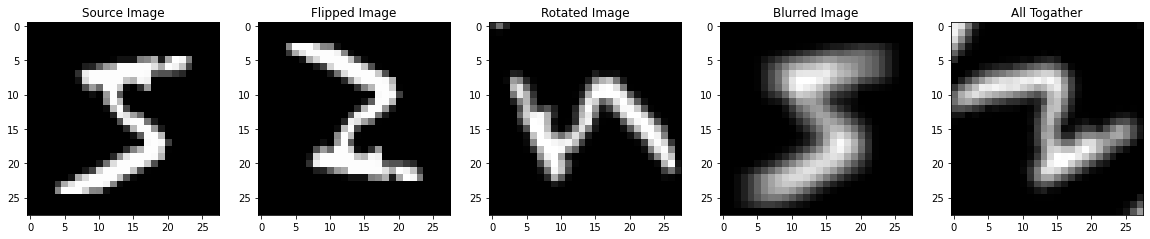

In [25]:
train_set = torchvision.datasets.MNIST(root='', train=True, download=True, transform=transforms.ToTensor())
num_classes = len(train_set)

src_img = np.asarray(train_set[0][0][0])
alb = Albumentations_augmentations()

# Flip
alb.set_flip()
alb.set_transform()
augmented = alb.transform(image=src_img)
flipped_img = augmented['image']
alb.set_flip(flag=True)

# Rotate
alb.set_rotate()
alb.set_transform()
augmented = alb.transform(image=src_img)
rotated_img = augmented['image']
alb.set_rotate(flag=True)

# Blur
alb.set_blur()
alb.set_transform()
augmented = alb.transform(image=src_img)
blurred_img = augmented['image']
alb.set_blur(flag=True)

# All Together
alb.set_flip()
alb.set_rotate()
alb.set_blur()
alb.set_transform()
augmented = alb.transform(image=src_img)
all_togather = augmented['image']
alb.delete_transform()

Image.show_all([src_img, flipped_img, rotated_img, blurred_img, all_togather], ['Source Image', 'Flipped Image', 'Rotated Image', 'Blurred Image', 'All Togather'])